In [1]:
# 1. Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Matplotlib is building the font cache; this may take a moment.


In [2]:
# 2. Carga de Datos (Usaremos el dataset de Diabetes de Sklearn por simplicidad)
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame
# Renombramos las columnas y la variable objetivo para claridad
df.columns = [col.upper() for col in df.columns]
df = df.rename(columns={'TARGET': 'GLUCOSE_LEVEL'})

print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

Primeras 5 filas del dataset:
        AGE       SEX       BMI        BP        S1        S2        S3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         S4        S5        S6  GLUCOSE_LEVEL  
0 -0.002592  0.019907 -0.017646          151.0  
1 -0.039493 -0.068332 -0.092204           75.0  
2 -0.002592  0.002861 -0.025930          141.0  
3  0.034309  0.022688 -0.009362          206.0  
4 -0.002592 -0.031988 -0.046641          135.0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A

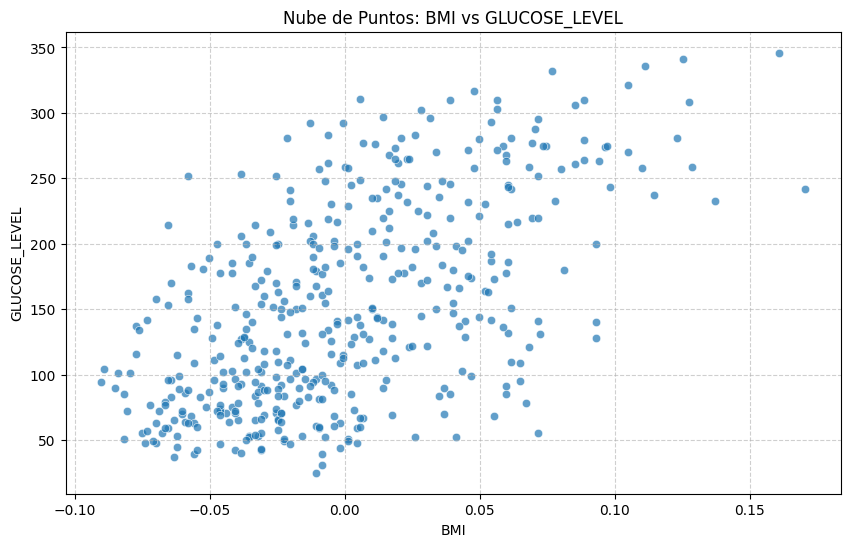

In [3]:
# 3. Visualización: Nube de Puntos
# Elegimos la columna 'BMI' (Índice de Masa Corporal) como ejemplo para visualizar
feature_x = 'BMI'
target_y = 'GLUCOSE_LEVEL'

plt.figure(figsize=(10, 6))
plt.scatter(df[feature_x], df[target_y], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title(f'Nube de Puntos: {feature_x} vs {target_y}')
plt.xlabel(feature_x)
plt.ylabel(target_y)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [4]:
# 4. Preprocesamiento: Separar X (features) e y (target)
X = df.drop(target_y, axis=1) # Todas las columnas excepto la objetivo
y = df[target_y]             # Solo la columna objetivo

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de Entrenamiento (X): {X_train.shape}")
print(f"Tamaño de Prueba (X): {X_test.shape}")

Tamaño de Entrenamiento (X): (353, 10)
Tamaño de Prueba (X): (89, 10)


In [6]:
# 5. Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# Evaluación
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr = r2_score(y_test, pred_lr)

print("--- Regresión Lineal ---")
print(f"RMSE (Error Cuadrático Medio Raíz): {rmse_lr:.2f}")
print(f"R^2 (Coeficiente de Determinación): {r2_lr:.2f}")

--- Regresión Lineal ---
RMSE (Error Cuadrático Medio Raíz): 53.85
R^2 (Coeficiente de Determinación): 0.45


In [7]:
# 6. Random Forest
# n_estimators es el número de árboles en el bosque
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

# Evaluación
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)

print("--- Random Forest ---")
print(f"RMSE (Error Cuadrático Medio Raíz): {rmse_rf:.2f}")
print(f"R^2 (Coeficiente de Determinación): {r2_rf:.2f}")

--- Random Forest ---
RMSE (Error Cuadrático Medio Raíz): 54.33
R^2 (Coeficiente de Determinación): 0.44


In [8]:
# 7. Elección de Modelo
print("\n--- Comparación de Modelos ---")
print(f"Regresión Lineal - RMSE: {rmse_lr:.2f} | R^2: {r2_lr:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f} | R^2: {r2_rf:.2f}")

# Elegir el modelo con menor RMSE (o mayor R2)
if rmse_rf < rmse_lr:
    modelo_elegido = rf
    nombre_modelo = "Random Forest"
    
elif rmse_lr < rmse_rf:
    modelo_elegido = lr
    nombre_modelo = "Regresión Lineal"

else:
    # Caso de empate o manejo de error, elegimos LR por defecto
    modelo_elegido = lr
    nombre_modelo = "Regresión Lineal"


--- Comparación de Modelos ---
Regresión Lineal - RMSE: 53.85 | R^2: 0.45
Random Forest - RMSE: 54.33 | R^2: 0.44


In [9]:
# 8. Guardado de Modelo
fichero_guardado = 'modelo_entrenado.pkl'
joblib.dump(modelo_elegido, fichero_guardado)

print(f"\n✅ Modelo elegido: {nombre_modelo}")
print(f"✅ Modelo guardado exitosamente como: {fichero_guardado}")


✅ Modelo elegido: Regresión Lineal
✅ Modelo guardado exitosamente como: modelo_entrenado.pkl
